In [1]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import ast
#Load Data
df = pd.read_csv('C:\\Users\\Joseans-M17\\Documents\\VScode VENV\\data_jobs.csv')
#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

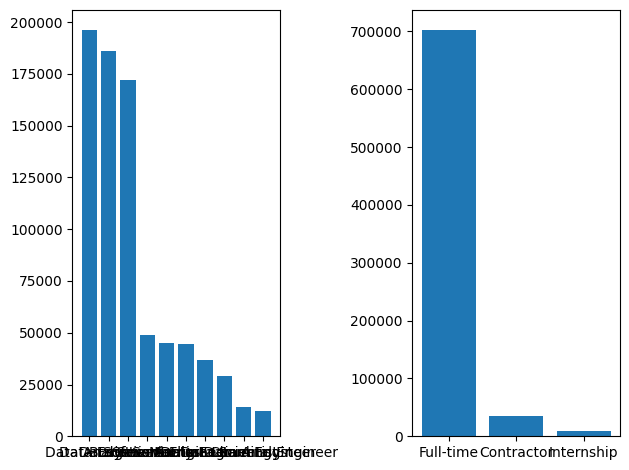

In [2]:
fig, ax = plt.subplots(1, 2)

#df['job_title_short'].value_counts().plot(kind='bar', ax=ax)

#df['job_title_short'].value_counts().plot(kind='bar',ax=ax[1])
#df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[0])

#fig.tight_layout()

ax[0].bar(df['job_title_short'].value_counts().index, df['job_title_short'].value_counts())
ax[1].bar(df['job_schedule_type'].value_counts().head(3).index, df['job_schedule_type'].value_counts().head(3))

plt.tight_layout()

In [3]:
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skills_count = df_skills.groupby(['job_skills','job_title_short']).size()
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count',ascending=False,inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
293,codecommit,Business Analyst,1
2233,xamarin,Machine Learning Engineer,1
1087,mlr,Machine Learning Engineer,1


In [4]:
job_titles = ['Data Scientist','Data Engineer','Data Analyst']

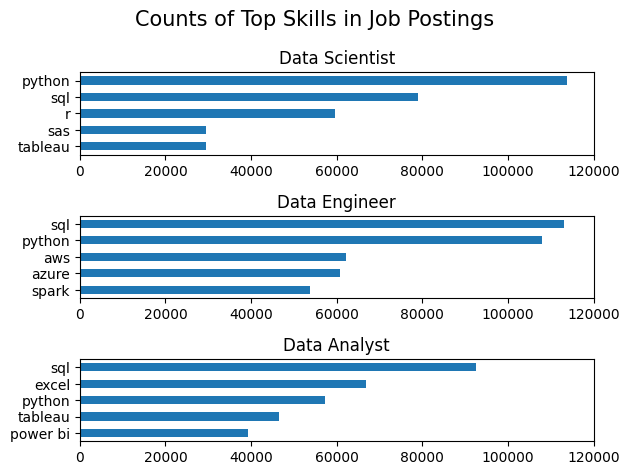

In [5]:
fig, ax = plt.subplots(3, 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 120000)

fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
fig.tight_layout()

# Add Pie plot Lesson

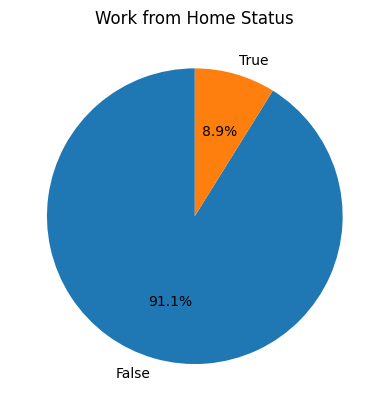

In [6]:
df['job_work_from_home'].value_counts().plot(kind='pie', startangle=90, autopct='%1.1f%%')
plt.title('Work from Home Status')
plt.ylabel('')
plt.show()

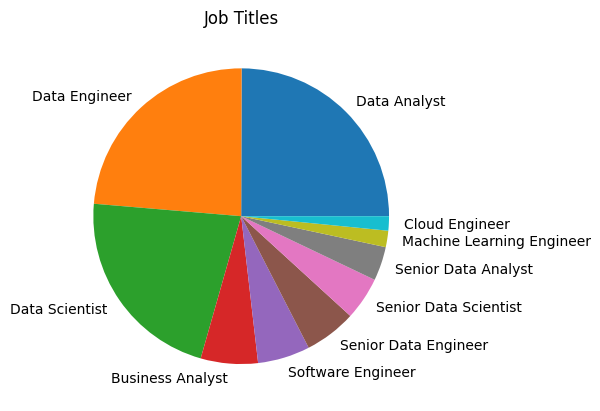

In [7]:
df['job_title_short'].value_counts().plot(kind='pie')
plt.title('Job Titles')
plt.ylabel('')
plt.show()

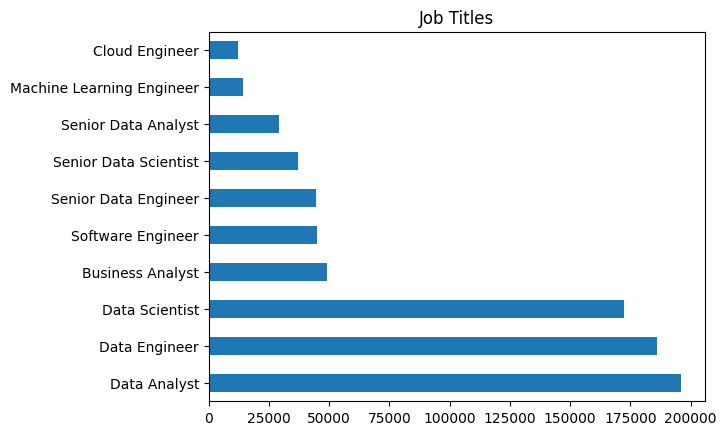

In [8]:
df['job_title_short'].value_counts().plot(kind='barh')
plt.title('Job Titles')
plt.ylabel('')
plt.show()

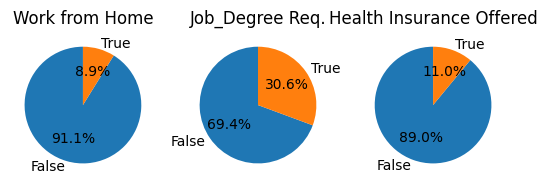

In [9]:
fig, ax = plt.subplots(1, 3)

dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Job_Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'
}
for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)

plt.show()

In [10]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,NaN,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,NaN,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,NaN,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"[bash, python, perl, linux, unix, kubernetes, ...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,NaN,NaN,NaN,HABA FAMILYGROUP,"[sas, sas, sql, excel]","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,NaN,NaN,NaN,Lendlease Corporation,"[powerpoint, excel]","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,NaN,NaN,NaN,Capital One,"[python, go, nosql, sql, mongo, shell, mysql, ...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


# Problems

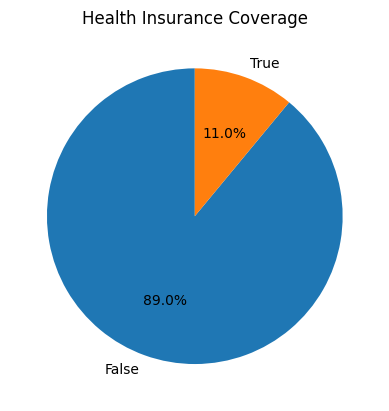

In [11]:
#Health Insurance Pie Chart

df['job_health_insurance'].value_counts().plot(kind='pie', startangle=90, autopct='%1.1f%%')
plt.title('Health Insurance Coverage')
plt.ylabel('')
plt.show()


In [12]:
#Job Schedule Distribution
df['job_schedule_type'].value_counts().head(4)

job_schedule_type
Full-time     701727
Contractor     34793
Internship      8742
Part-time       7881
Name: count, dtype: int64

# Add Scatter Plot lesson

In [13]:
#data = {
#    'job_skills': ['python','sql','java','c++','c#','javascript','html','css','php','ruby'],
#    'skill_count': [30,25,20,15,10,5,4,3,2,1],
#    'skill_pay': [100,90,80,70,60,50,40,30,20,10]
#}

#df = pd.DataFrame(data)

#df.plot(kind='scatter', x='skill_count', y='skill_pay')

In [14]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import ast
#Load Data
df = pd.read_csv('C:\\Users\\Joseans-M17\\Documents\\VScode VENV\\data_jobs.csv')
#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

df = df[df['job_title_short'] == 'Data Analyst']

In [15]:
df_exploded = df.explode('job_skills')

skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    median_salary=('salary_year_avg','median')
)

skills_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(10)

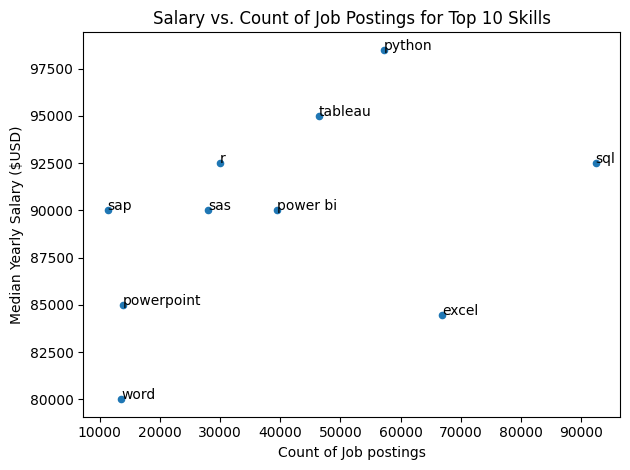

In [16]:
skills_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('Count of Job postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.tight_layout()

for i, txt in enumerate(skills_stats.index):
    plt.text(skills_stats['skill_count'].iloc[i], skills_stats['median_salary'].iloc[i], txt)

plt.show()

Add Advanced Customization Lesson

In [1]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import ast
#Load Data
df = pd.read_csv('C:\\Users\\Joseans-M17\\Documents\\VScode VENV\\data_jobs.csv')
#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

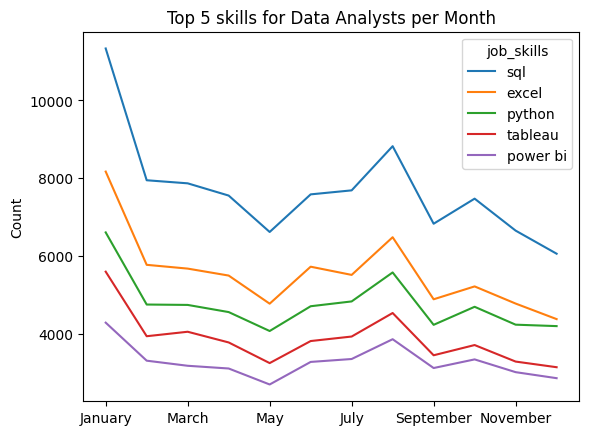

In [4]:
# Create a new column for month number
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

# Explode the job_skills column and pivot
df_DA_explode = df_DA.explode('job_skills')
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

# sort the skills by count
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot = df_DA_pivot.drop('Total')

# Use month names for plotting
df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%B'))
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot = df_DA_pivot.drop(columns='job_posted_month_no')

# Get the top 5 skills
df_DA_pivot.iloc[:, :5].plot(kind='line')

plt.title('Top 5 skills for Data Analysts per Month')
plt.ylabel('Count')
plt.xlabel("")
plt.show()

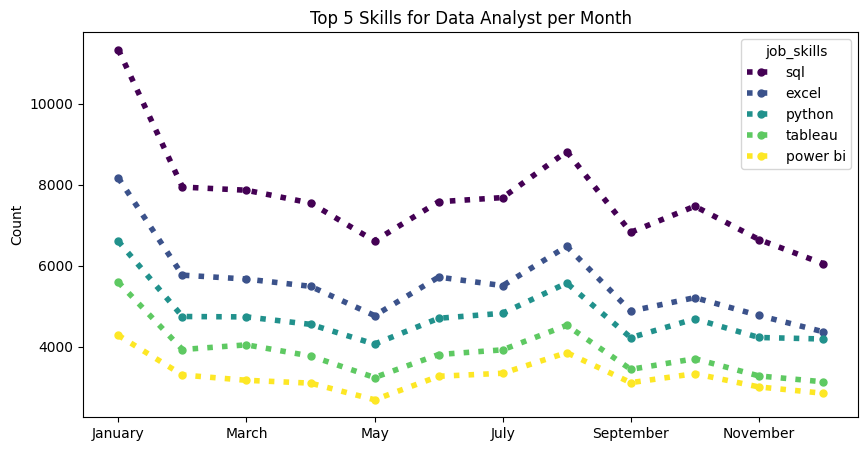

In [ ]:
#Parameters for the plot
df_DA_pivot.iloc[:, :5].plot(
    kind='line', # Parameters for other plots can be found at matplotlib.org
    linewidth=4,
    linestyle=':', # options: '-', '--', '-.', ':'
    colormap='viridis', #more colors at matplotlib.org/cheatsheets/
    marker='o', # options: 'o', 'x', '+', '*', 's', ',', '.', '1', '2', '3', '4', '8', '^', '<', '>', 'v', 'p', 'h', '|', '_'
    markersize=5,
    figsize=(10,5)
)
plt.title('Top 5 Skills for Data Analyst per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

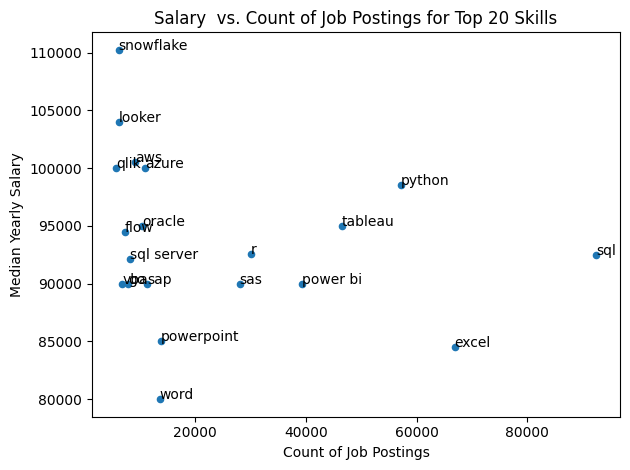

In [35]:
# Explode the 'job_skills' into individual rows
df_exploded = df_DA.explode('job_skills')

# Calculate the average salary and count of job postings per skill
skill_stats = df_exploded.groupby('job_skills').agg(
    median_salary=('salary_year_avg', 'median'),
    skill_count=('job_skills', 'count')
)

# Limit to the top skills
skill_count = 20
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(skill_count)

#skill_stats

skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')

for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Salary  vs. Count of Job Postings for Top {skill_count} Skills')
plt.tight_layout()
plt.show()

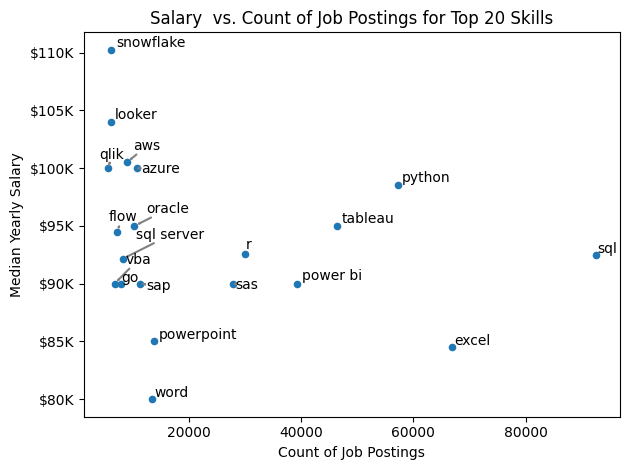

In [48]:
# AdjustText library lesson. Documentation at adjusttext.readthedocs.io
#!pip install adjustText

# from adjustText import adjust_text

skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')

texts = []
for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=1.5))

#fig, ax = plt.subplot() # calls the plots axis

ax = plt.gca() # gca = Get Current Axis
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Salary  vs. Count of Job Postings for Top {skill_count} Skills')
plt.tight_layout()
plt.show()


Problems

In [2]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import ast
#Load Data
df = pd.read_csv('C:\\Users\\Joseans-M17\\Documents\\VScode VENV\\data_jobs.csv')
#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

df_CE = df[df['job_title_short'] == 'Cloud Engineer'].copy()

Text(0, 0.5, 'Posts per Month')

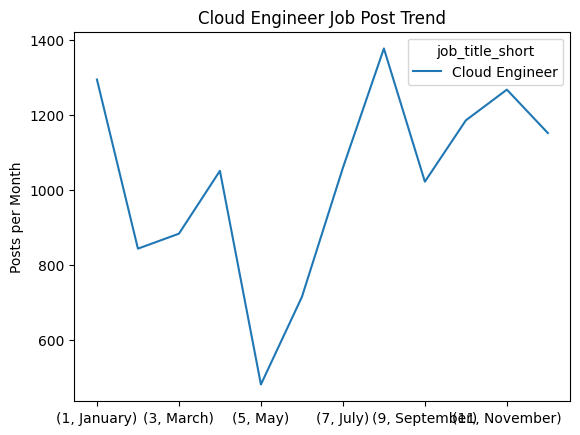

In [5]:
df_CE['job_posted_month_no'] = df_CE['job_posted_date'].dt.month
df_CE['job_posted_month'] = df_CE['job_posted_date'].dt.month_name()
df_CE.sort_values(by='job_posted_month_no', inplace=True)
df_CE.set_index('job_posted_month_no')
df_CE_pivot = df_CE.pivot_table(index=['job_posted_month_no', 'job_posted_month'], columns='job_title_short', aggfunc='size')
df_CE_pivot
df_CE_pivot.plot(kind='line')
plt.title('Cloud Engineer Job Post Trend')
plt.xlabel('')
plt.ylabel('Posts per Month')
#plt.tight_layout()